In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [13]:
df = pd.read_csv('/content/Loan_default.csv.zip')
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [14]:
X = df.drop(['Default', 'LoanID'], axis = 1)
Y = df.Default

In [15]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)

In [16]:
numeric_cols = x_train.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
x_train[numeric_cols] = scaler.fit_transform(x_train[numeric_cols])
x_test[numeric_cols] = scaler.transform(x_test[numeric_cols])

In [20]:
categorical_cols = x_train.select_dtypes(include=['object']).columns
x_train = pd.get_dummies(x_train, columns=categorical_cols, drop_first=True)
x_test = pd.get_dummies(x_test, columns=categorical_cols, drop_first=True)

In [21]:
lr = LogisticRegression(max_iter =1000, random_state =42)
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
classify_lr = classification_report(y_test,lr_pred)
print(classify_lr)
acc_lr = accuracy_score(y_test,lr_pred)
print(acc_lr)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.61      0.03      0.06      5900

    accuracy                           0.89     51070
   macro avg       0.75      0.51      0.50     51070
weighted avg       0.86      0.89      0.84     51070

0.885823379674956


In [22]:
rf = RandomForestClassifier(n_estimators =100, max_depth = 6, random_state =42)
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)
rf_classify = classification_report(y_test,rf_pred)
print(rf_classify)
acc_rf = accuracy_score(y_test,rf_pred)
print(acc_rf)

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     45170
           1       0.00      0.00      0.00      5900

    accuracy                           0.88     51070
   macro avg       0.44      0.50      0.47     51070
weighted avg       0.78      0.88      0.83     51070

0.8844722929312708


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [23]:
xgb = XGBClassifier(n_estimators =100, max_depth = 6, learning_rate =0.05,eval_metric = 'logloss', use_label_encoder =False, random_state = 42)
xgb.fit(x_train,y_train)
xgb_pred = xgb.predict(x_test)
xgb_classify = classification_report(y_test,xgb_pred)
print(xgb_classify)
acc_xgb = accuracy_score(y_test, xgb_pred)
print(acc_xgb)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [06:16:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.66      0.06      0.10      5900

    accuracy                           0.89     51070
   macro avg       0.78      0.53      0.52     51070
weighted avg       0.86      0.89      0.84     51070

0.8876052476992363


Logistic Regression : Results
Accuracy : 0.885823379674956
Classification Report :               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.61      0.03      0.06      5900

    accuracy                           0.89     51070
   macro avg       0.75      0.51      0.50     51070
weighted avg       0.86      0.89      0.84     51070



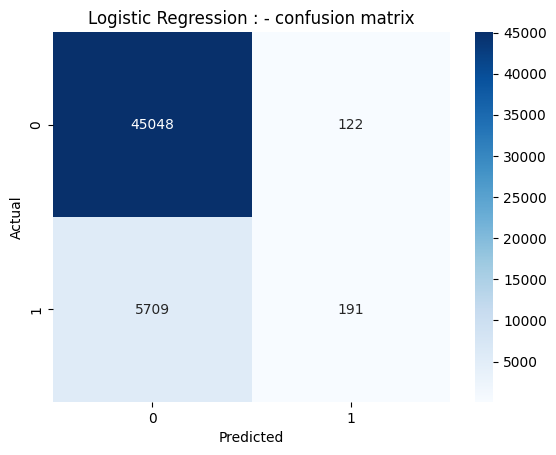

Random Forest : Results
Accuracy : 0.8844722929312708
Classification Report :               precision    recall  f1-score   support

           0       0.88      1.00      0.94     45170
           1       0.00      0.00      0.00      5900

    accuracy                           0.88     51070
   macro avg       0.44      0.50      0.47     51070
weighted avg       0.78      0.88      0.83     51070



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


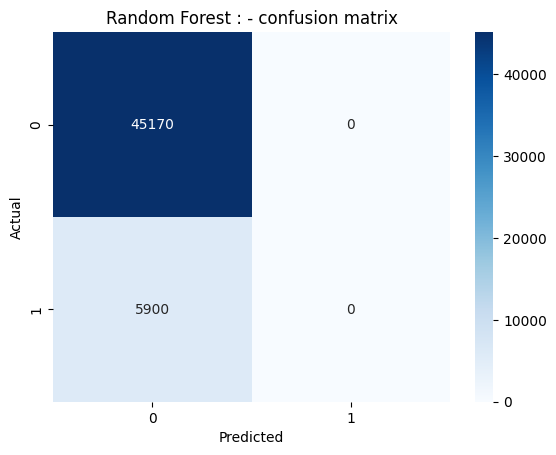

XGB : Results
Accuracy : 0.8844722929312708
Classification Report :               precision    recall  f1-score   support

           0       0.88      1.00      0.94     45170
           1       0.00      0.00      0.00      5900

    accuracy                           0.88     51070
   macro avg       0.44      0.50      0.47     51070
weighted avg       0.78      0.88      0.83     51070



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


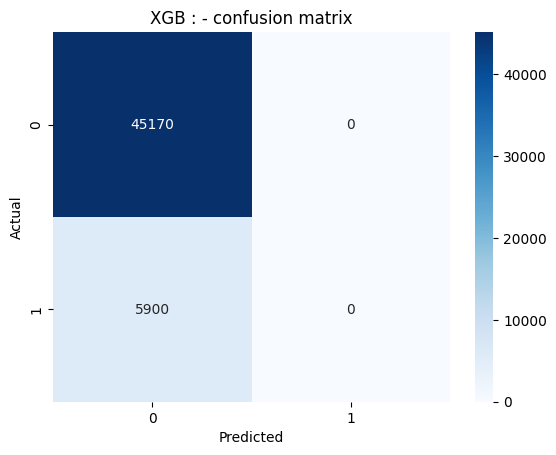

In [29]:
def eval_model(name, y_true, y_pred):
  print(f'{name} Results')
  print("Accuracy :", accuracy_score(y_true, y_pred))
  print("Classification Report :", classification_report(y_true, y_pred))
  cm = confusion_matrix(y_true, y_pred)
  sns.heatmap(cm, annot = True, fmt ='d', cmap = 'Blues')
  plt.title(f'{name} - confusion matrix')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

eval_model('Logistic Regression :',y_test, lr_pred)
eval_model('Random Forest :',y_test, rf_pred)
eval_model('XGB :',y_test, rf_pred)

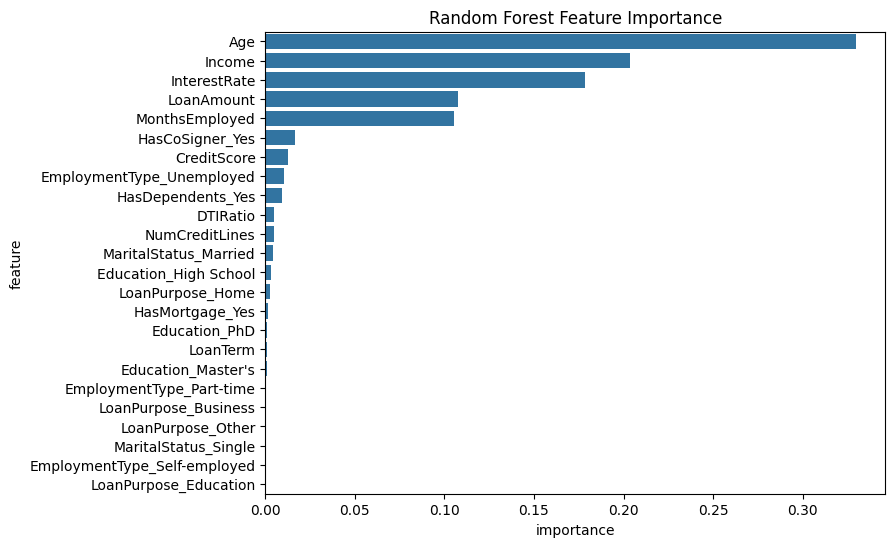

In [31]:
feat_imp = pd.DataFrame({'feature': rf.feature_names_in_, 'importance': rf.feature_importances_}).sort_values(by='importance', ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x='importance', y='feature', data=feat_imp)
plt.title("Random Forest Feature Importance")
plt.show()